In [0]:
#Gerekli Kütüphaneler
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [5]:
from google.colab import files

uploaded = files.upload()

Saving Hitter.csv to Hitter (1).csv


In [0]:
df=pd.read_csv("./Hitter.csv")
df=df.dropna() #eksik değerler siliniyor
dms=pd.get_dummies(df[['League', 'Division', 'NewLeague']]) #kategorik değişkenler dummy e çevrildi.One hot encoding yaklaşımı yapılmış oluyor.
y=df["Salary"]  #bağımlı değişken
X_=df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X=pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]], axis=1) #oluşturulan dummyler ve bir önceki veri seti bir araya getirilerek bağımsız değişkenlerin nihai hali elde edildi.
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.25,
                                                  random_state=42) #veri seti 25e 75 ayrılmış oldu. test train

In [7]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [8]:
df.shape

(263, 20)

In [0]:
ridge_model=Ridge(alpha=5).fit(X_train, y_train)

In [14]:
ridge_model

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [15]:
ridge_model.coef_ #katsayılar  (farklı lambda değerlerine karşı farklı katsayılar oluşacak ve bunlar üzerinden kurulan modeller ve bunların neticesinde oluşan hatalar incelenecek, buna göre de optimum alphaya(lamda) karar verileck)

array([ -1.81040449,   8.87872786,   7.12487047,  -3.31713488,
        -2.01162162,   5.40691525,   7.25828404,  -0.13033385,
        -0.25425913,  -0.71109275,   1.81452   ,   0.77083457,
        -0.6768975 ,   0.26211894,   0.2646614 ,  -0.36947934,
        76.19519054, -90.15523668, -16.00453535])

In [16]:
ridge_model.intercept_ #sabit katsayı

-3.4251968687181034

In [0]:
lambdalar=10**np.linspace(10,-2,100)*0.5  #rastgele lambda değerleri oluşturuldu. Devamında bu değerlee karşı katsayıların nasıl değişeceği gözlemlenecek

In [18]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [0]:
ridge_model=Ridge()  #ridge model nesne oluşturuldu
katsayilar=[]

for i in lambdalar:
  ridge_model.set_params(alpha=i)
  ridge_model.fit(X_train, y_train)
  katsayilar.append(ridge_model.coef_)      #set_params parametreleri ayarlamak için kullanılır.

In [0]:
katsayilar

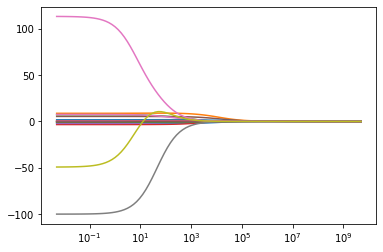

In [21]:
ax=plt.gca()
ax.plot(lambdalar, katsayilar)  #lambdalar karşı gelen katsayılar görselleşecek
ax.set_xscale("log")  #x ekseni lambdalar
#Ridge Regression anlamsız parametreleri sıfıra yaklaştırır. Burada da parametreleri sıfıra yaklaştırdığı görünmektedir. 

**Tahmin**

In [22]:
ridge_model=Ridge().fit(X_train, y_train)
y_pred=ridge_model.predict(X_train)
y_pred[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [23]:
y_train[0:10]  #bunlar gerçek değerler

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [24]:
#train setler model kuruldu, test setle test edildi. Fakat iki setin de hatası olacak
#Train Hatası
RMSE=np.sqrt(mean_squared_error(y_train, y_pred))  #hata kareler ortalaması
RMSE  #bu valide edilmemiş doğrulanmamış bir hatadır.

289.34470696006565

In [26]:
from sklearn.model_selection import cross_val_score
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))  #burada da cross val ile hata hesabı yapılmıştır ve daha doğrudur diğerine göre.

351.39315856063195

In [27]:
#Test Hatası
y_pred=ridge_model.predict(X_test)
RMSE=np.sqrt(mean_squared_error(y_test, y_pred))  #hata kareler ortalaması
RMSE

356.8082905730239

**Model Tuning**

In [28]:
ridge_model=Ridge(1).fit(X_train, y_train)  #burada hangi alfa değerinin minimum olacağını bilmiyoruz. bunu deneme yanılma yoluyla yapmak istediğimizde burada model değerleirni tune etmiş oluyoruz.
y_pred=ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.8082905730239

In [33]:
lambdalar1=np.random.randint(0,1000,100)
lambdalar2=10**np.linspace(10,-2,100)*0.5

ridgecv = RidgeCV(alphas=lambdalar2, scoring="neg_mean_squared_error", cv=10, normalize=True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [34]:
ridgecv.alpha_  #optimum olması gereken lambda

0.7599555414764666

In [0]:
#final modeli
#yani buraya bulunan optimum alpha değeri eklenmiş olur
ridge_tuned=Ridge(alpha=ridgecv.alpha_).fit(X_train, y_train)


In [36]:
y_pred=ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.85830472715236

In [37]:
##Lambda1 için işlemler ypıldığında
ridgecv = RidgeCV(alphas=lambdalar1, scoring="neg_mean_squared_error", cv=10, normalize=True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_
ridge_tuned=Ridge(alpha=ridgecv.alpha_).fit(X_train, y_train)
y_pred=ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.3054852721754